# Helper

In [427]:
#helper function
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [428]:
#helper function > Create list for indexing
item_index = []
for i in range(1,41):
    item_index += 2 * [i]
print(item_index)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40]


# Comparison type

`Pairwise comparison of sentence pairs, accurate if score(P-sentence) > score(I-sentence):`

In [429]:
import os
import copy

rootdir = '/Users/carinakauf/Desktop/ComputationalPlausibility/results-modeling/EventsRev/'

accuracy = []

def find_all_models(directory):
    models = []
    for subdir, dirs, files in os.walk(directory):
        file_names = [file for file in files if "txt" in file]
        transformers = [file for file in files if any(y in file for y in ["bert","xlnet","gpt2"])]
        transformers.sort()
        baselines = diff(file_names, transformers)
        baselines.sort()
        models = baselines + transformers
        return models
    
model_list = find_all_models(rootdir)
print(model_list)

['dtfit_model_sg.txt', 'fast_vectors_sum.txt', 'sgDeps_vectors_sum.txt', 'sg_vectors_sum.txt', 'bert_large_scores.txt', 'bert_large_scores_verb.txt', 'bert_scores.txt', 'gpt2-xl-res.txt', 'roberta_large_scores.txt', 'roberta_large_scores_verb.txt', 'roberta_scores.txt', 'xlnet_large_scores.txt', 'xlnet_large_scores_verb.txt', 'xlnet_scores.txt']


In [430]:
def get_accuracies_per_model(model_list,directory):
    accuracies = []
    for model in model_list:
        df = pd.read_csv(directory+"{}".format(model), header = None, names = ["plausibility","sentence","score"], sep='\t')
        if model == "dtfit_model_sg.txt":
            long_item_index = copy.deepcopy(item_index)
            long_item_index += 2 * [41]
            df["item_index"] = long_item_index
            accurate = 0
            for i in range(1,42):
                curr_df = df.loc[df['item_index'] == i]
                if curr_df.loc[curr_df['plausibility'] == "P"]["score"].values[0] > curr_df.loc[curr_df['plausibility'] == "I"]["score"].values[0]:
                    accurate += 1
            accuracies.append(accurate/(len(df)/2)) 
        else:
            df["item_index"] = item_index
            accurate = 0
            for i in range(1,41):
                curr_df = df.loc[df['item_index'] == i]
                if curr_df.loc[curr_df['plausibility'] == "P"]["score"].values[0] > curr_df.loc[curr_df['plausibility'] == "I"]["score"].values[0]:
                    accurate += 1 
            accuracies.append(accurate/(len(df)/2)) 
    return accuracies

accuracies = get_accuracies_per_model(model_list,rootdir)

### Special treatment for PPMI/Surprisal

In [431]:
xls_df = pd.read_excel("typicalityModels.xlsx")
#xls_df

In [432]:
xls_models = ["surprisal","ppmi"]
xls_accuracies = []
for ind, model in enumerate(xls_models):
    xls_df = pd.read_excel("typicalityModels.xlsx")
    xls_df["item_index"] = item_index
    accurate = 0
    print(ind,model)
    for i in range(1,41):
        curr_df = xls_df.loc[xls_df['item_index'] == i]
        if model == "surprisal":
            if curr_df.loc[curr_df['Typicality'] == "P"]["Surprisal"].values[0] < curr_df.loc[curr_df['Typicality'] == "I"]["Surprisal"].values[0]:
                accurate += 1 
        else:
            if curr_df.loc[curr_df['Typicality'] == "P"]["ppmi"].values[0] > curr_df.loc[curr_df['Typicality'] == "I"]["ppmi"].values[0]:
                accurate += 1 
    xls_accuracies.append(accurate/(len(xls_df)/2)) 
print(xls_accuracies)

0 surprisal
1 ppmi
[0.475, 0.85]


# Add to other model scores

In [433]:
all_models = xls_models + model_list
all_accuracies = xls_accuracies + accuracies

# Plotting

In [434]:
model_names = [model.split(".")[0] for model in all_models]
print(model_names)

['surprisal', 'ppmi', 'dtfit_model_sg', 'fast_vectors_sum', 'sgDeps_vectors_sum', 'sg_vectors_sum', 'bert_large_scores', 'bert_large_scores_verb', 'bert_scores', 'gpt2-xl-res', 'roberta_large_scores', 'roberta_large_scores_verb', 'roberta_scores', 'xlnet_large_scores', 'xlnet_large_scores_verb', 'xlnet_scores']


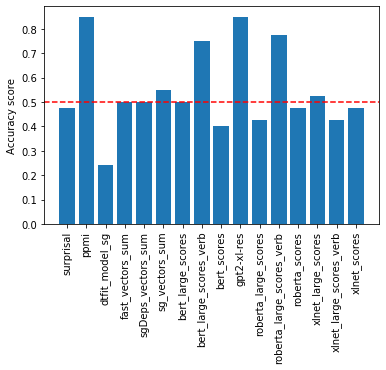

In [435]:
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.arange(len(all_models)) 

model_names = [model.split(".")[0] for model in all_models]

plt.axhline(y=0.5, color='r', linestyle='--')  
plt.bar(x_pos, all_accuracies, align='center')
plt.xticks(x_pos, model_names, rotation = 90) 
plt.ylabel('Accuracy score')
plt.show()